## Конвертация данных для обучения детектора строчек в YOLO-формат

In [1]:
IMG_EXAMPLE = '/home/asya/studying/Проекты/serial_number_recognition/ocr/rotated_for_ocr/rotated_for_ocr/img/IMG_1748_ROD_901072579.png'
ANN_EXAMPLE = '/home/asya/studying/Проекты/serial_number_recognition/ocr/rotated_for_ocr/rotated_for_ocr/ann/IMG_1748_ROD_901072579.png.json'

In [4]:
import matplotlib.pyplot as plt

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

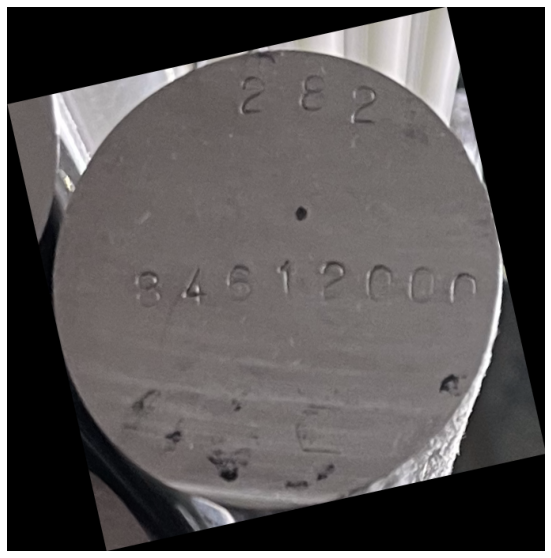

In [5]:
import cv2

img = cv2.imread(IMG_EXAMPLE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
visualize(img)

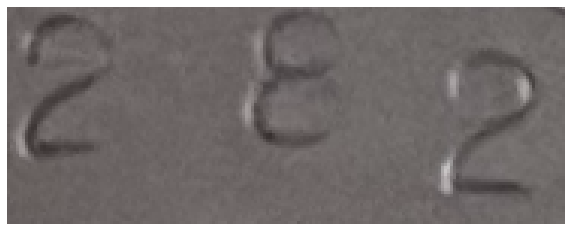

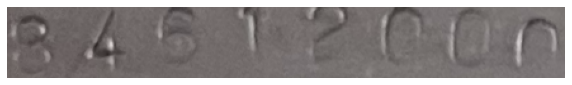

In [12]:
import json

with open(ANN_EXAMPLE) as f:
    file_content = f.read()
    annotation = json.loads(file_content)
    for i, obj in enumerate(annotation['objects']):
        y1, x1 = obj['points']['exterior'][0]
        y3, x3 = obj['points']['exterior'][1]
        y2, x2 = y1, x3
        y4, x4 = y3, x1
        visualize(img[x1:x3, y1:y3, :])

In [1]:
TRAIN_IMAGES = '/home/asya/studying/Проекты/serial_number_recognition/ocr/paddle_dataset/train_data'
TEST_IMAGES = '/home/asya/studying/Проекты/serial_number_recognition/ocr/paddle_dataset/test_data'

SUPERVISELY_ANNS = '/home/asya/studying/Проекты/serial_number_recognition/ocr/rotated_for_ocr/rotated_for_ocr/ann'

In [2]:
TRAIN_LABELS = '/home/asya/studying/Проекты/serial_number_recognition/ocr/paddle_dataset/labels/train_data'
TEST_LABELS = '/home/asya/studying/Проекты/serial_number_recognition/ocr/paddle_dataset/labels/test_data'

In [3]:
import os
import json

for filename in os.listdir(SUPERVISELY_ANNS):
    img_name = filename.replace('.json', '')
    with open(os.path.join(SUPERVISELY_ANNS, filename)) as f:
        file_content = f.read()
        annotation = json.loads(file_content)
    img_height = annotation['size']['height']
    img_width = annotation['size']['width']
    for i, obj in enumerate(annotation['objects']):
        x1, y1 = obj['points']['exterior'][0]
        x3, y3 = obj['points']['exterior'][1]
        x_center = (x1 + x3) / (2 * img_width)
        y_center = (y1 + y3) / (2 * img_height)
        width = (x3 - x1) / img_width
        height = (y3 - y1) / img_height
        out_arr = [0, x_center, y_center, width, height]
        if img_name in os.listdir(TRAIN_IMAGES):
            with open(os.path.join(TRAIN_LABELS, img_name.replace('.png', '') + '.txt'), 'a') as f:
                out_str = ' '.join([str(s) for s in out_arr])
                f.write(out_str + '\n')
        else:
            with open(os.path.join(TEST_LABELS, img_name.replace('.png', '') + '.txt'), 'a') as f:
                out_str = ' '.join([str(s) for s in out_arr])
                f.write(out_str + '\n')

In [4]:
max_height, max_width = 0, 0
for filename in os.listdir(SUPERVISELY_ANNS):
    img_name = filename.replace('.json', '')
    with open(os.path.join(SUPERVISELY_ANNS, filename)) as f:
        file_content = f.read()
        annotation = json.loads(file_content)
    img_height = annotation['size']['height']
    img_width = annotation['size']['width']
    max_height = max(max_height, img_height)
    max_width = max(max_width, img_width)
    
print(max_height, max_width)

4561 4446


In [7]:
for filename in os.listdir(SUPERVISELY_ANNS):
    img_name = filename.replace('.json', '')
    with open(os.path.join(SUPERVISELY_ANNS, filename)) as f:
        file_content = f.read()
        annotation = json.loads(file_content)
    img_height = annotation['size']['height']
    img_width = annotation['size']['width']
    if img_width > 4000 or img_height > 4000:
        print(img_name)

IMG_6498_ROD_901779847.png
IMG_6495_ROD_901780455.png
IMG_6497_ROD_901780064.png
IMG_6496_ROD_901780234.png
